In [1]:
# non-stratified sample QC
# run on autosomes only, non-LD pruned data

import hail as hl
import pyspark
from hail.plot import show
hl.plot.output_notebook()

from bokeh.plotting import output_file, save, reset_output

sc = pyspark.SparkContext()
tmp_dir = "hdfs://spark-master:9820/"
lustre_dir = "file:///lustre/scratch123/qc/"
hl.init(sc=sc, tmp_dir=tmp_dir, default_reference="GRCh38")

Loading BokehJS ...

2022-04-13 13:07:50 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
pip-installed Hail requires additional configuration options in Spark referring
  to the path to the Hail Python module directory HAIL_DIR,
  e.g. /path/to/python/site-packages/hail:
    spark.jars=HAIL_DIR/backend/hail-all-spark.jar
    spark.driver.extraClassPath=HAIL_DIR/backend/hail-all-spark.jar
    spark.executor.extraClassPath=./hail-all-spark.jarRunning on Apache Spark version 3.1.2
SparkUI available at http://spark-master:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.88-7d39379870da
LOGGING: writing to /home/ubuntu/jupyter/hail-20220413-1307-0.2.88-7d39379870da.log


In [2]:
ht_sample_qc_file = lustre_dir + "matrixtables/non_stratified_sample_qc_cols.ht"
ht = hl.read_table(ht_sample_qc_file)
ht.show()

+-------------------+---------+---------------------+--------------+
| s                 | batch   | sequencing_location | assigned_pop |
+-------------------+---------+---------------------+--------------+
| str               | str     | str                 | str          |
+-------------------+---------+---------------------+--------------+
| "EGAN00003143328" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143329" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143330" | "38268" | "Sanger"            | "AFR"        |
| "EGAN00003143331" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143334" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143336" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143337" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143338" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143339" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143340" | "38268" | "Sanger"            | "EUR"        |
+-------------------+---------+---------------------+--------------+

+-------------------------+--------------------------+------------------------+
| sample_qc.dp_stats.mean | sample_qc.dp_stats.stdev | sample_qc.dp_stats.min |
+-------------------------+--------------------------+------------------------+
|                 float64 |                  float64 |                float64 |
+-------------------------+--------------------------+------------------------+
|                2.73e+01 |                 1.66e+01 |               0.00e+00 |
|                2.48e+01 |                 1.49e+01 |               0.00e+00 |
|                2.61e+01 |                 1.51e+01 |               0.00e+00 |
|                2.59e+01 |                 1.60e+01 |               0.00e+00 |
|                2.56e+01 |                 1.47e+01 |               0.00e+00 |
|                2.64e+01 |                 1.56e+01 |               0.00e+00 |
|                2.86e+01 |                 1.76e+01 |               0.00e+00 |
|                2.54e+01 |                 1.53e+01 |               0.00e+00 |
|                2.69e+01 |                 1.57e+01 |               0.00e+00 |
|                2.65e+01 |                 1.54e+01 |               0.00e+00 |
+-------------------------+--------------------------+------------------------+

+------------------------+-------------------------+--------------------------+
| sample_qc.dp_stats.max | sample_qc.gq_stats.mean | sample_qc.gq_stats.stdev |
+------------------------+-------------------------+--------------------------+
|                float64 |                 float64 |                  float64 |
+------------------------+-------------------------+--------------------------+
|               1.35e+03 |                6.49e+01 |                 3.05e+01 |
|               1.07e+03 |                5.99e+01 |                 3.12e+01 |
|               1.45e+03 |                6.26e+01 |                 3.07e+01 |
|               1.01e+03 |                6.20e+01 |                 3.13e+01 |
|               1.01e+03 |                6.18e+01 |                 3.07e+01 |
|               1.03e+03 |                6.31e+01 |                 3.06e+01 |
|               1.55e+03 |                6.77e+01 |                 2.96e+01 |
|               1.12e+03 |                6.13e+01 |                 3.09e+01 |
|               1.17e+03 |                6.43e+01 |                 3.05e+01 |
|               1.32e+03 |                6.35e+01 |                 3.05e+01 |
+------------------------+-------------------------+--------------------------+

+------------------------+------------------------+---------------------+
| sample_qc.gq_stats.min | sample_qc.gq_stats.max | sample_qc.call_rate |
+------------------------+------------------------+---------------------+
|                float64 |                float64 |             float64 |
+------------------------+-----------

In [3]:
#create subset for each assigned pop, and convert each to a pandas dataframe
AFRht = ht.filter(ht.assigned_pop == 'AFR')
AMRht = ht.filter(ht.assigned_pop == 'AMR')
EURht = ht.filter(ht.assigned_pop == 'EUR')
EASht = ht.filter(ht.assigned_pop == 'EAS')
SASht = ht.filter(ht.assigned_pop == 'SAS')
othht = ht.filter(ht.assigned_pop == 'oth')

AFR_df = AFRht.to_pandas(flatten=True)
AMR_df = AMRht.to_pandas(flatten=True)
EUR_df = EURht.to_pandas(flatten=True)
EAS_df = EASht.to_pandas(flatten=True)
SAS_df = SASht.to_pandas(flatten=True)
oth_df = othht.to_pandas(flatten=True)
all_df = ht.to_pandas(flatten=True)

In [4]:
#create subset for each batch and convery to pandas dataframe
b1ht = ht.filter(ht.batch == 'batch1')
b2ht = ht.filter(ht.batch == 'batch2')
b3ht = ht.filter(ht.batch == 'batch3')
b4ht = ht.filter(ht.batch == 'batch4')
b5ht = ht.filter(ht.batch == 'batch5')
b6ht = ht.filter(ht.batch == 'batch6')
nobatchht = ht.filter(hl.is_defined(ht.batch), keep=False)

b1_df = b1ht.to_pandas(flatten=True)
b2_df = b2ht.to_pandas(flatten=True)
b3_df = b3ht.to_pandas(flatten=True)
b4_df = b4ht.to_pandas(flatten=True)
b5_df = b5ht.to_pandas(flatten=True)
b6_df = b6ht.to_pandas(flatten=True)
nobatch_df = nobatchht.to_pandas(flatten=True)

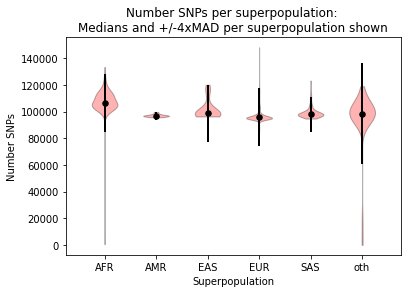

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plot_dir = "/lustre/scratch123/qc/plots/sample_qc/"

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Superpopulation')
    
#plots for nSNPs and pop
metric = 'sample_qc.n_snp'
m1 = AFR_df[metric].median()
m2 = AMR_df[metric].median()
m3 = EAS_df[metric].median()
m4 = EUR_df[metric].median()
m5 = SAS_df[metric].median()
m6 = oth_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6])
q1 = np.array([m1-(4*AFR_df.mad()[metric]), m2-(4*AMR_df.mad()[metric]), m3-(4*EAS_df.mad()[metric]), m4-(4*EAS_df.mad()[metric]), m5-(4*EUR_df.mad()[metric]), m6-(4*oth_df.mad()[metric])])
q2 = np.array([m1+(4*AFR_df.mad()[metric]), m2+(4*AMR_df.mad()[metric]), m3+(4*EAS_df.mad()[metric]), m4+(4*EAS_df.mad()[metric]), m5+(4*EUR_df.mad()[metric]), m6+(4*oth_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Number SNPs per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Number SNPs')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'nSNP_violin_with_4MAD_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

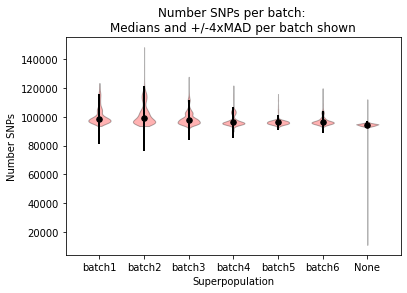

In [6]:
#plots for nSNPs and batch
metric = 'sample_qc.n_snp'
m1 = b1_df[metric].median()
m2 = b2_df[metric].median()
m3 = b3_df[metric].median()
m4 = b4_df[metric].median()
m5 = b5_df[metric].median()
m6 = b6_df[metric].median()
m7 = nobatch_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6, m7])
q1 = np.array([m1-(4*b1_df.mad()[metric]), m2-(4*b2_df.mad()[metric]), m3-(4*b3_df.mad()[metric]), m4-(4*b4_df.mad()[metric]), m5-(4*b5_df.mad()[metric]), m6-(4*b6_df.mad()[metric]), m7-(4*nobatch_df.mad()[metric])])
q2 = np.array([m1+(4*b1_df.mad()[metric]), m2+(4*b2_df.mad()[metric]), m3+(4*b3_df.mad()[metric]), m4+(4*b4_df.mad()[metric]), m5+(4*b5_df.mad()[metric]), m6+(4*b6_df.mad()[metric]), m7+(4*nobatch_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Number SNPs per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Number SNPs')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'nSNP_violin_with_4MAD_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

/home/ubuntu/venv/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


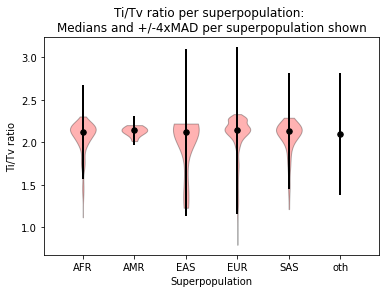

In [7]:
#plots for rTiTv and pop
metric = 'sample_qc.r_ti_tv'
m1 = AFR_df[metric].median()
m2 = AMR_df[metric].median()
m3 = EAS_df[metric].median()
m4 = EUR_df[metric].median()
m5 = SAS_df[metric].median()
m6 = oth_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6])
q1 = np.array([m1-(4*AFR_df.mad()[metric]), m2-(4*AMR_df.mad()[metric]), m3-(4*EAS_df.mad()[metric]), m4-(4*EAS_df.mad()[metric]), m5-(4*EUR_df.mad()[metric]), m6-(4*oth_df.mad()[metric])])
q2 = np.array([m1+(4*AFR_df.mad()[metric]), m2+(4*AMR_df.mad()[metric]), m3+(4*EAS_df.mad()[metric]), m4+(4*EAS_df.mad()[metric]), m5+(4*EUR_df.mad()[metric]), m6+(4*oth_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Ti/Tv ratio per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Ti/Tv ratio')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rTiTv_violin_with_4MAD_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

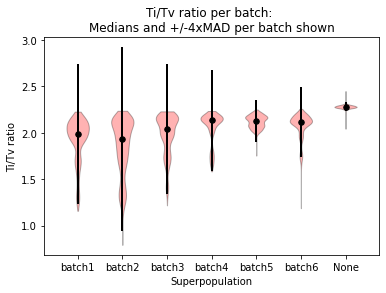

In [8]:
#plots for rTiTv and batch
metric = 'sample_qc.r_ti_tv'
m1 = b1_df[metric].median()
m2 = b2_df[metric].median()
m3 = b3_df[metric].median()
m4 = b4_df[metric].median()
m5 = b5_df[metric].median()
m6 = b6_df[metric].median()
m7 = nobatch_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6, m7])
q1 = np.array([m1-(4*b1_df.mad()[metric]), m2-(4*b2_df.mad()[metric]), m3-(4*b3_df.mad()[metric]), m4-(4*b4_df.mad()[metric]), m5-(4*b5_df.mad()[metric]), m6-(4*b6_df.mad()[metric]), m7-(4*nobatch_df.mad()[metric])])
q2 = np.array([m1+(4*b1_df.mad()[metric]), m2+(4*b2_df.mad()[metric]), m3+(4*b3_df.mad()[metric]), m4+(4*b4_df.mad()[metric]), m5+(4*b5_df.mad()[metric]), m6+(4*b6_df.mad()[metric]), m7+(4*nobatch_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Ti/Tv ratio per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Ti/Tv ratio')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rTiTv_violin_with_4MAD_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

/home/ubuntu/venv/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


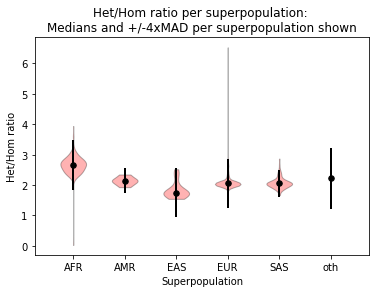

In [9]:
#plots for rHetHom and pop
metric = 'sample_qc.r_het_hom_var'
m1 = AFR_df[metric].median()
m2 = AMR_df[metric].median()
m3 = EAS_df[metric].median()
m4 = EUR_df[metric].median()
m5 = SAS_df[metric].median()
m6 = oth_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6])
q1 = np.array([m1-(4*AFR_df.mad()[metric]), m2-(4*AMR_df.mad()[metric]), m3-(4*EAS_df.mad()[metric]), m4-(4*EAS_df.mad()[metric]), m5-(4*EUR_df.mad()[metric]), m6-(4*oth_df.mad()[metric])])
q2 = np.array([m1+(4*AFR_df.mad()[metric]), m2+(4*AMR_df.mad()[metric]), m3+(4*EAS_df.mad()[metric]), m4+(4*EAS_df.mad()[metric]), m5+(4*EUR_df.mad()[metric]), m6+(4*oth_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Het/Hom ratio per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Het/Hom ratio')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rHetHom_violin_with_4MAD_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

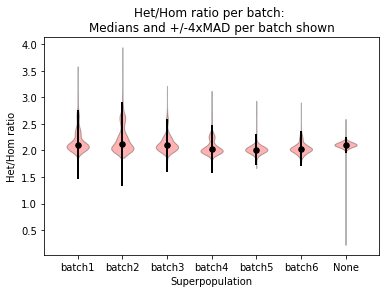

In [10]:
#plots for rHetHom and batch
metric = 'sample_qc.r_het_hom_var'
m1 = b1_df[metric].median()
m2 = b2_df[metric].median()
m3 = b3_df[metric].median()
m4 = b4_df[metric].median()
m5 = b5_df[metric].median()
m6 = b6_df[metric].median()
m7 = nobatch_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6, m7])
q1 = np.array([m1-(4*b1_df.mad()[metric]), m2-(4*b2_df.mad()[metric]), m3-(4*b3_df.mad()[metric]), m4-(4*b4_df.mad()[metric]), m5-(4*b5_df.mad()[metric]), m6-(4*b6_df.mad()[metric]), m7-(4*nobatch_df.mad()[metric])])
q2 = np.array([m1+(4*b1_df.mad()[metric]), m2+(4*b2_df.mad()[metric]), m3+(4*b3_df.mad()[metric]), m4+(4*b4_df.mad()[metric]), m5+(4*b5_df.mad()[metric]), m6+(4*b6_df.mad()[metric]), m7+(4*nobatch_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Het/Hom ratio per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Het/Hom ratio')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rHetHom_violin_with_4MAD_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

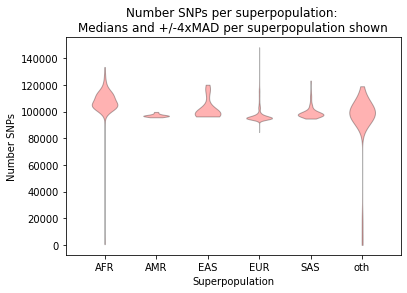

In [20]:
#violin plots without MAD annotation
#plots for nSNPs and pop
metric = 'sample_qc.n_snp'

fig, ax = plt.subplots()
ax.set_title('Number SNPs per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Number SNPs')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'nSNP_violin_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

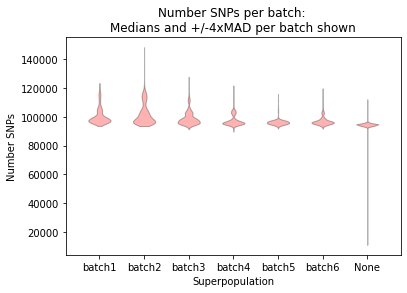

In [11]:
#plots for nSNPs and batch
metric = 'sample_qc.n_snp'

fig, ax = plt.subplots()
ax.set_title('Number SNPs per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Number SNPs')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'nSNP_violin_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

/home/ubuntu/venv/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


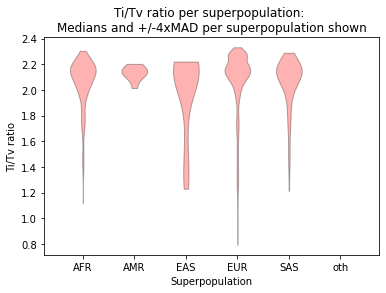

In [12]:
#plots for rTiTv and pop
metric = 'sample_qc.r_ti_tv'

fig, ax = plt.subplots()
ax.set_title('Ti/Tv ratio per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Ti/Tv ratio')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rTiTv_violin_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

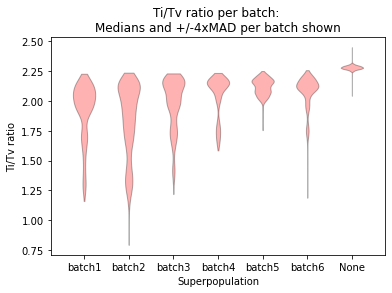

In [13]:
#plots for rTiTv and batch
metric = 'sample_qc.r_ti_tv'

fig, ax = plt.subplots()
ax.set_title('Ti/Tv ratio per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Ti/Tv ratio')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rTiTv_violin_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

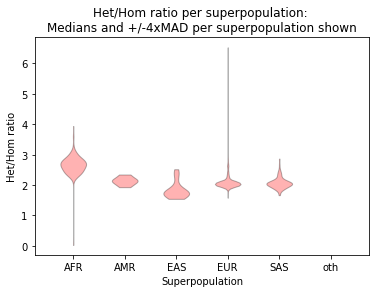

In [14]:
#plots for rHetHom and pop
metric = 'sample_qc.r_het_hom_var'

fig, ax = plt.subplots()
ax.set_title('Het/Hom ratio per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Het/Hom ratio')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    

labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rHetHom_violin_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

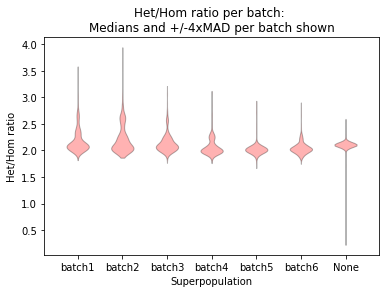

In [15]:
#plots for rHetHom and batch
metric = 'sample_qc.r_het_hom_var'

fig, ax = plt.subplots()
ax.set_title('Het/Hom ratio per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Het/Hom ratio')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rHetHom_violin_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

In [16]:
#scatter plots, nSNP, rTiTv, rHetHom coloured by batch
tmp_file = "/lustre/scratch123/qc//plots/sample_qc/tmp.html"#temp file for plots
import os

p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='Ti/Tv ratio', label=ht.batch, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/nsnp_titv_not_strat.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [17]:
p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_het_hom_var, xlabel='nSNP', ylabel='Het/Hom ratio', label=ht.batch, collect_all = True)
plot_file = "/lustre/scratch123/qc/plots/sample_qc/nsnp_rhethom_not_strat.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [19]:
p = hl.plot.scatter(ht.sample_qc.r_ti_tv, ht.sample_qc.r_het_hom_var, xlabel='Ti/Tv ratio', ylabel='Het/Hom ratio', label=ht.batch, collect_all = True)
plot_file = "/lustre/scratch123/qc/plots/sample_qc/titv_rhethom_not_strat.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [7]:
#There are clearly some variant problems
#investigate filtering by GQ, DP and VAF to exclude false positive variants and then re-run sample QC
mtfile = lustre_dir + "matrixtables/gatk_unprocessed.mt"
mt = hl.read_matrix_table(mtfile)
mt.entries().show()

+---------------+------------+------+----------+----------+--------------+
| locus         | alleles    | rsid |     qual | filters  | info.AC      |
+---------------+------------+------+----------+----------+--------------+
| locus<GRCh38> | array<str> | str  |  float64 | set<str> | array<int32> |
+---------------+------------+------+----------+----------+--------------+
| chr1:65529    | ["C","T"]  | NA   | 1.50e+03 | NA       | [6]          |
| chr1:65529    | ["C","T"]  | NA   | 1.50e+03 | NA       | [6]          |
| chr1:65529    | ["C","T"]  | NA   | 1.50e+03 | NA       | [6]          |
| chr1:65529    | ["C","T"]  | NA   | 1.50e+03 | NA       | [6]          |
| chr1:65529    | ["C","T"]  | NA   | 1.50e+03 | NA       | [6]          |
| chr1:65529    | ["C","T"]  | NA   | 1.50e+03 | NA       | [6]          |
| chr1:65529    | ["C","T"]  | NA   | 1.50e+03 | NA       | [6]          |
| chr1:65529    | ["C","T"]  | NA   | 1.50e+03 | NA       | [6]          |
| chr1:65529    | ["C","T"]  | NA   | 1.50e+03 | NA       | [6]          |
| chr1:65529    | ["C","T"]  | NA   | 1.50e+03 | NA       | [6]          |
+---------------+------------+------+----------+----------+--------------+

+----------------+---------+----------------------+----------------+
| info.AF        | info.AN | info.AS_BaseQRankSum | info.AS_FS     |
+----------------+---------+----------------------+----------------+
| array<float64> |   int32 | array<float64>       | array<float64> |
+----------------+---------+----------------------+----------------+
| [2.00e-04]     |   29946 | [0.00e+00]           | [0.00e+00]     |
| [2.00e-04]     |   29946 | [0.00e+00]           | [0.00e+00]     |
| [2.00e-04]     |   29946 | [0.00e+00]           | [0.00e+00]     |
| [2.00e-04]     |   29946 | [0.00e+00]           | [0.00e+00]     |
| [2.00e-04]     |   29946 | [0.00e+00]           | [0.00e+00]     |
| [2.00e-04]     |   29946 | [0.00e+00]           | [0.00e+00]     |
| [2.00e-04]     |   29946 | [0.00e+00]           | [0.00e+00]     |
| [2.00e-04]     |   29946 | [0.00e+00]           | [0.00e+00]     |
| [2.00e-04]     |   29946 | [0.00e+00]           | [0.00e+00]     |
| [2.00e-04]     |   29946 | [0.00e+00]           | [0.00e+00]     |
+----------------+---------+----------------------+----------------+

+-------------------------+----------------+-------------------+
| info.AS_InbreedingCoeff | info.AS_MQ     | info.AS_MQRankSum |
+-------------------------+----------------+-------------------+
| array<float64>          | array<float64> | array<float64>    |
+-------------------------+----------------+-------------------+
| [3.38e-01]              | [2.70e+01]     | [0.00e+00]        |
| [3.38e-01]              | [2.70e+01]     | [0.00e+00]        |
| [3.38e-01]              | [2.70e+01]     | [0.00e+00]        |
| [3.38e-01]              | [2.70e+01]     | [0.00e+00]        |
| [3.38e-01]              | [2.70e+01]     | [0.00e+00]        |
| [3.38e-01]              | [2.70e+01]     | [0.00e+00]        |
| [3.38e-01]              | [2.70e+01]     | [0.00e+00]        |
| [3.38e-01]              | [2.70e+01]     | [0.00e+00]        |
| [3.38e-01]              | [2.70e+01]     | [0.00e+00]        |
| [3.38e-01]              | [2.70e+01]     | [0.00e+00]        |
+-------------------------+----------------+-------------------+

+----------------+--------------------------+----------------+
| info.AS_QD     | info.AS_RAW_BaseQRankSum | info.AS_RAW_MQ |
+----------------+--------------------------+----------------+
| array<float64> | str                      | str            |
+----------------+--------------------------+----------------+
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA  

In [10]:
#autosomes only and split multiallelic - need to split multi for VAF
mt = mt.filter_rows(mt.locus.in_autosome())
mt = hl.split_multi(mt)

In [11]:
#calculate VAF 
vaf = mt.AD[1] / hl.sum(mt.AD)

In [12]:
intervals = ['chr20']
mt = hl.filter_intervals(mt, [hl.parse_locus_interval(x, reference_genome='GRCh38') for x in intervals])

In [14]:
out_file = lustre_dir + "matrixtables/tests/chr20_unprocessed.mt"
mt.write(out_file, overwrite=True)

2022-04-01 14:57:11 Hail: INFO: Coerced sorted dataset                          
2022-04-01 15:01:43 Hail: INFO: reading 167 of 5907 data partitions+ 3) / 12210]
2022-04-01 15:02:24 Hail: INFO: wrote matrix table with 238239 rows and 14973 columns in 167 partitions to file:///lustre/scratch123/qc/matrixtables/tests/chr20_unprocessed.mt
    Total size: 14.24 GiB
    * Rows/entries: 14.24 GiB
    * Columns: 59.41 KiB
    * Globals: 11.00 B
    * Smallest partition: 662 rows (38.83 MiB)
    * Largest partition:  2208 rows (132.39 MiB)


In [16]:
mt20 = hl.read_matrix_table(out_file)
#calculate VAF 
vaf20 = mt20.AD[1] / hl.sum(mt20.AD)

In [17]:
#plot GQ
p = hl.plot.histogram(mt20.GQ, range=(0,100), bins=20, legend='GQ')
show(p)

In [18]:
p = hl.plot.histogram(mt20.DP, range=(0,100), legend='DP')
show(p)

In [20]:
p = hl.plot.histogram(vaf20, range=(0,1), legend='VAF')
show(p)

In [4]:
#3 sets of QC - unfiltered, relaxed filters (DP & GQ >= 10, VAF >= 0.125), stringent filters  (DP & GQ >= 20, VAF >= 0.25). Annotated with run ID
ht_sample_qc_file = lustre_dir + "matrixtables/non_stratified_sample_qc_cols.ht"
ht = hl.read_table(ht_sample_qc_file)
ht.show()

+-------------------+---------+---------------------+--------------+
| s                 | batch   | sequencing_location | assigned_pop |
+-------------------+---------+---------------------+--------------+
| str               | str     | str                 | str          |
+-------------------+---------+---------------------+--------------+
| "EGAN00003143328" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143329" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143330" | "38268" | "Sanger"            | "AFR"        |
| "EGAN00003143331" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143334" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143336" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143337" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143338" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143339" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143340" | "38268" | "Sanger"            | "EUR"        |
+-------------------+---------+---------------------+--------------+

+-------------------------+--------------------------+------------------------+
| sample_qc.dp_stats.mean | sample_qc.dp_stats.stdev | sample_qc.dp_stats.min |
+-------------------------+--------------------------+------------------------+
|                 float64 |                  float64 |                float64 |
+-------------------------+--------------------------+------------------------+
|                2.73e+01 |                 1.66e+01 |               0.00e+00 |
|                2.48e+01 |                 1.49e+01 |               0.00e+00 |
|                2.61e+01 |                 1.51e+01 |               0.00e+00 |
|                2.59e+01 |                 1.60e+01 |               0.00e+00 |
|                2.56e+01 |                 1.47e+01 |               0.00e+00 |
|                2.64e+01 |                 1.56e+01 |               0.00e+00 |
|                2.86e+01 |                 1.76e+01 |               0.00e+00 |
|                2.54e+01 |                 1.53e+01 |               0.00e+00 |
|                2.69e+01 |                 1.57e+01 |               0.00e+00 |
|                2.65e+01 |                 1.54e+01 |               0.00e+00 |
+-------------------------+--------------------------+------------------------+

+------------------------+-------------------------+--------------------------+
| sample_qc.dp_stats.max | sample_qc.gq_stats.mean | sample_qc.gq_stats.stdev |
+------------------------+-------------------------+--------------------------+
|                float64 |                 float64 |                  float64 |
+------------------------+-------------------------+--------------------------+
|               1.35e+03 |                6.49e+01 |                 3.05e+01 |
|               1.07e+03 |                5.99e+01 |                 3.12e+01 |
|               1.45e+03 |                6.26e+01 |                 3.07e+01 |
|               1.01e+03 |                6.20e+01 |                 3.13e+01 |
|               1.01e+03 |                6.18e+01 |                 3.07e+01 |
|               1.03e+03 |                6.31e+01 |                 3.06e+01 |
|               1.55e+03 |                6.77e+01 |                 2.96e+01 |
|               1.12e+03 |                6.13e+01 |                 3.09e+01 |
|               1.17e+03 |                6.43e+01 |                 3.05e+01 |
|               1.32e+03 |                6.35e+01 |                 3.05e+01 |
+------------------------+-------------------------+--------------------------+

+------------------------+------------------------+---------------------+
| sample_qc.gq_stats.min | sample_qc.gq_stats.max | sample_qc.call_rate |
+------------------------+------------------------+---------------------+
|                float64 |                float64 |             float64 |
+------------------------+-----------

In [5]:
tmp_file = "/lustre/scratch123/qc//plots/sample_qc/tmp.html"#temp file for plots
import os

p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='Ti/Tv ratio', label=ht.batch, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/nsnp_titv_unfiltered_runid.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [6]:
from bokeh.plotting import reset_output
reset_output()
hl.plot.output_notebook()
p2 = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='Ti/Tv ratio', label=ht.batch, collect_all = True)
show(p2)

Loading BokehJS ...

In [7]:
ht_sample_qc_file = lustre_dir + "matrixtables/non_stratified_sample_qc_cols_dp10_gq10_vaf0_15.ht"
ht2 = hl.read_table(ht_sample_qc_file)
ht2.show()

+-------------------+---------+---------------------+--------------+
| s                 | batch   | sequencing_location | assigned_pop |
+-------------------+---------+---------------------+--------------+
| str               | str     | str                 | str          |
+-------------------+---------+---------------------+--------------+
| "EGAN00003143328" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143329" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143330" | "38268" | "Sanger"            | "AFR"        |
| "EGAN00003143331" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143334" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143336" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143337" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143338" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143339" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143340" | "38268" | "Sanger"            | "EUR"        |
+-------------------+---------+---------------------+--------------+

+-------------------------+--------------------------+------------------------+
| sample_qc.dp_stats.mean | sample_qc.dp_stats.stdev | sample_qc.dp_stats.min |
+-------------------------+--------------------------+------------------------+
|                 float64 |                  float64 |                float64 |
+-------------------------+--------------------------+------------------------+
|                3.05e+01 |                 1.50e+01 |               1.10e+01 |
|                2.90e+01 |                 1.32e+01 |               1.10e+01 |
|                2.96e+01 |                 1.35e+01 |               1.10e+01 |
|                3.00e+01 |                 1.43e+01 |               1.10e+01 |
|                2.92e+01 |                 1.30e+01 |               1.10e+01 |
|                2.98e+01 |                 1.41e+01 |               1.10e+01 |
|                3.13e+01 |                 1.59e+01 |               1.10e+01 |
|                2.92e+01 |                 1.37e+01 |               1.10e+01 |
|                3.01e+01 |                 1.39e+01 |               1.10e+01 |
|                2.98e+01 |                 1.38e+01 |               1.10e+01 |
+-------------------------+--------------------------+------------------------+

+------------------------+-------------------------+--------------------------+
| sample_qc.dp_stats.max | sample_qc.gq_stats.mean | sample_qc.gq_stats.stdev |
+------------------------+-------------------------+--------------------------+
|                float64 |                 float64 |                  float64 |
+------------------------+-------------------------+--------------------------+
|               1.32e+03 |                7.34e+01 |                 2.45e+01 |
|               1.04e+03 |                7.06e+01 |                 2.51e+01 |
|               1.30e+03 |                7.17e+01 |                 2.49e+01 |
|               1.01e+03 |                7.23e+01 |                 2.48e+01 |
|               1.01e+03 |                7.10e+01 |                 2.49e+01 |
|               1.00e+03 |                7.20e+01 |                 2.48e+01 |
|               1.53e+03 |                7.48e+01 |                 2.39e+01 |
|               1.10e+03 |                7.10e+01 |                 2.49e+01 |
|               1.17e+03 |                7.28e+01 |                 2.45e+01 |
|               1.16e+03 |                7.21e+01 |                 2.47e+01 |
+------------------------+-------------------------+--------------------------+

+------------------------+------------------------+---------------------+
| sample_qc.gq_stats.min | sample_qc.gq_stats.max | sample_qc.call_rate |
+------------------------+------------------------+---------------------+
|                float64 |                float64 |             float64 |
+------------------------+-----------

In [8]:
p = hl.plot.scatter(ht2.sample_qc.n_snp, ht2.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='Ti/Tv ratio', label=ht2.batch, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/nsnp_titv_relaxed_filters_runid.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [9]:
reset_output()
hl.plot.output_notebook()
p2 = hl.plot.scatter(ht2.sample_qc.n_snp, ht2.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='Ti/Tv ratio', label=ht2.batch, collect_all = True)
show(p2)

Loading BokehJS ...

In [10]:
ht_sample_qc_file = lustre_dir + "matrixtables/non_stratified_sample_qc_cols_dp20_gq20_vaf0_25.ht"
ht3 = hl.read_table(ht_sample_qc_file)
ht3.show()

+-------------------+---------+---------------------+--------------+
| s                 | batch   | sequencing_location | assigned_pop |
+-------------------+---------+---------------------+--------------+
| str               | str     | str                 | str          |
+-------------------+---------+---------------------+--------------+
| "EGAN00003143328" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143329" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143330" | "38268" | "Sanger"            | "AFR"        |
| "EGAN00003143331" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143334" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143336" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143337" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143338" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143339" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143340" | "38268" | "Sanger"            | "EUR"        |
+-------------------+---------+---------------------+--------------+

+-------------------------+--------------------------+------------------------+
| sample_qc.dp_stats.mean | sample_qc.dp_stats.stdev | sample_qc.dp_stats.min |
+-------------------------+--------------------------+------------------------+
|                 float64 |                  float64 |                float64 |
+-------------------------+--------------------------+------------------------+
|                3.59e+01 |                 1.38e+01 |               2.10e+01 |
|                3.50e+01 |                 1.12e+01 |               2.10e+01 |
|                3.54e+01 |                 1.16e+01 |               2.10e+01 |
|                3.56e+01 |                 1.27e+01 |               2.10e+01 |
|                3.51e+01 |                 1.08e+01 |               2.10e+01 |
|                3.55e+01 |                 1.24e+01 |               2.10e+01 |
|                3.62e+01 |                 1.49e+01 |               2.10e+01 |
|                3.51e+01 |                 1.19e+01 |               2.10e+01 |
|                3.56e+01 |                 1.23e+01 |               2.10e+01 |
|                3.54e+01 |                 1.20e+01 |               2.10e+01 |
+-------------------------+--------------------------+------------------------+

+------------------------+-------------------------+--------------------------+
| sample_qc.dp_stats.max | sample_qc.gq_stats.mean | sample_qc.gq_stats.stdev |
+------------------------+-------------------------+--------------------------+
|                float64 |                 float64 |                  float64 |
+------------------------+-------------------------+--------------------------+
|               1.32e+03 |                8.52e+01 |                 1.56e+01 |
|               1.04e+03 |                8.40e+01 |                 1.62e+01 |
|               1.30e+03 |                8.44e+01 |                 1.61e+01 |
|               1.01e+03 |                8.48e+01 |                 1.59e+01 |
|               1.01e+03 |                8.41e+01 |                 1.62e+01 |
|               1.00e+03 |                8.45e+01 |                 1.60e+01 |
|               1.53e+03 |                8.54e+01 |                 1.55e+01 |
|               1.10e+03 |                8.41e+01 |                 1.61e+01 |
|               1.17e+03 |                8.47e+01 |                 1.58e+01 |
|               1.16e+03 |                8.46e+01 |                 1.59e+01 |
+------------------------+-------------------------+--------------------------+

+------------------------+------------------------+---------------------+
| sample_qc.gq_stats.min | sample_qc.gq_stats.max | sample_qc.call_rate |
+------------------------+------------------------+---------------------+
|                float64 |                float64 |             float64 |
+------------------------+-----------

In [11]:
p = hl.plot.scatter(ht3.sample_qc.n_snp, ht3.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='Ti/Tv ratio', label=ht3.batch, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/nsnp_titv_stringent_filters_runid.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [12]:
reset_output()
hl.plot.output_notebook()
p2 = hl.plot.scatter(ht3.sample_qc.n_snp, ht3.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='Ti/Tv ratio', label=ht3.batch, collect_all = True)
show(p2)

Loading BokehJS ...

In [22]:
#select some samples with excess SNPs and low rTiTv to plot
ht.filter(ht.sequencing_location == "Bristol").show()

+----------+-------+---------------------+--------------+
| s        | batch | sequencing_location | assigned_pop |
+----------+-------+---------------------+--------------+
| str      | str   | str                 | str          |
+----------+-------+---------------------+--------------+
| "Z00003" | NA    | "Bristol"           | "EUR"        |
| "Z00010" | NA    | "Bristol"           | "EUR"        |
| "Z00014" | NA    | "Bristol"           | "EUR"        |
| "Z00019" | NA    | "Bristol"           | "EUR"        |
| "Z00020" | NA    | "Bristol"           | "EUR"        |
| "Z00027" | NA    | "Bristol"           | "EUR"        |
| "Z00028" | NA    | "Bristol"           | "EUR"        |
| "Z00032" | NA    | "Bristol"           | "EUR"        |
| "Z00045" | NA    | "Bristol"           | "EUR"        |
| "Z00049" | NA    | "Bristol"           | "EUR"        |
+----------+-------+---------------------+--------------+

+-------------------------+--------------------------+------------------------+
| sample_qc.dp_stats.mean | sample_qc.dp_stats.stdev | sample_qc.dp_stats.min |
+-------------------------+--------------------------+------------------------+
|                 float64 |                  float64 |                float64 |
+-------------------------+--------------------------+------------------------+
|                2.76e+01 |                 1.21e+01 |               0.00e+00 |
|                3.11e+01 |                 1.48e+01 |               0.00e+00 |
|                3.20e+01 |                 1.71e+01 |               0.00e+00 |
|                3.09e+01 |                 1.44e+01 |               0.00e+00 |
|                3.18e+01 |                 1.43e+01 |               0.00e+00 |
|                3.28e+01 |                 1.56e+01 |               0.00e+00 |
|                3.17e+01 |                 1.62e+01 |               0.00e+00 |
|                3.33e+01 |                 1.62e+01 |               0.00e+00 |
|                3.06e+01 |                 1.44e+01 |               0.00e+00 |
|                3.31e+01 |                 1.66e+01 |               0.00e+00 |
+-------------------------+--------------------------+------------------------+

+------------------------+-------------------------+--------------------------+
| sample_qc.dp_stats.max | sample_qc.gq_stats.mean | sample_qc.gq_stats.stdev |
+------------------------+-------------------------+--------------------------+
|                float64 |                 float64 |                  float64 |
+------------------------+-------------------------+--------------------------+
|               7.93e+02 |                7.27e+01 |                 2.35e+01 |
|               1.19e+03 |                7.85e+01 |                 2.20e+01 |
|               1.56e+03 |                7.98e+01 |                 2.14e+01 |
|               1.00e+03 |                7.88e+01 |                 2.14e+01 |
|               1.05e+03 |                8.02e+01 |                 2.11e+01 |
|               1.10e+03 |                8.17e+01 |                 2.06e+01 |
|               1.09e+03 |                7.85e+01 |                 2.23e+01 |
|               1.39e+03 |                8.30e+01 |                 1.93e+01 |
|               1.16e+03 |                7.78e+01 |                 2.22e+01 |
|               1.31e+03 |                8.18e+01 |                 2.04e+01 |
+------------------------+-------------------------+--------------------------+

+------------------------+------------------------+---------------------+
| sample_qc.gq_stats.min | sample_qc.gq_stats.max | sample_qc.call_rate |
+------------------------+------------------------+---------------------+
|                float64 |                float64 |             float64 |
+------------------------+------------------------+---------------------+
|               0.00e+00 |               9.90e+01 |            1.00e+00 |
|               0.00e+00 |               9.90e+01 |            1.

In [4]:
#plot unfiltered data nSNP vs rTi/Tv coloured by fraction CA
# p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='Ti/Tv ratio', label=ht.batch, collect_all = True)
# show(p)
ht.show()

+-------------------+---------+---------------------+--------------+
| s                 | batch   | sequencing_location | assigned_pop |
+-------------------+---------+---------------------+--------------+
| str               | str     | str                 | str          |
+-------------------+---------+---------------------+--------------+
| "EGAN00003143328" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143329" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143330" | "38268" | "Sanger"            | "AFR"        |
| "EGAN00003143331" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143334" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143336" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143337" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143338" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143339" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143340" | "38268" | "Sanger"            | "EUR"        |
+-------------------+---------+---------------------+--------------+

+-------------------------+--------------------------+------------------------+
| sample_qc.dp_stats.mean | sample_qc.dp_stats.stdev | sample_qc.dp_stats.min |
+-------------------------+--------------------------+------------------------+
|                 float64 |                  float64 |                float64 |
+-------------------------+--------------------------+------------------------+
|                2.73e+01 |                 1.66e+01 |               0.00e+00 |
|                2.48e+01 |                 1.49e+01 |               0.00e+00 |
|                2.61e+01 |                 1.51e+01 |               0.00e+00 |
|                2.59e+01 |                 1.60e+01 |               0.00e+00 |
|                2.56e+01 |                 1.47e+01 |               0.00e+00 |
|                2.64e+01 |                 1.56e+01 |               0.00e+00 |
|                2.86e+01 |                 1.76e+01 |               0.00e+00 |
|                2.54e+01 |                 1.53e+01 |               0.00e+00 |
|                2.69e+01 |                 1.57e+01 |               0.00e+00 |
|                2.65e+01 |                 1.54e+01 |               0.00e+00 |
+-------------------------+--------------------------+------------------------+

+------------------------+-------------------------+--------------------------+
| sample_qc.dp_stats.max | sample_qc.gq_stats.mean | sample_qc.gq_stats.stdev |
+------------------------+-------------------------+--------------------------+
|                float64 |                 float64 |                  float64 |
+------------------------+-------------------------+--------------------------+
|               1.35e+03 |                6.49e+01 |                 3.05e+01 |
|               1.07e+03 |                5.99e+01 |                 3.12e+01 |
|               1.45e+03 |                6.26e+01 |                 3.07e+01 |
|               1.01e+03 |                6.20e+01 |                 3.13e+01 |
|               1.01e+03 |                6.18e+01 |                 3.07e+01 |
|               1.03e+03 |                6.31e+01 |                 3.06e+01 |
|               1.55e+03 |                6.77e+01 |                 2.96e+01 |
|               1.12e+03 |                6.13e+01 |                 3.09e+01 |
|               1.17e+03 |                6.43e+01 |                 3.05e+01 |
|               1.32e+03 |                6.35e+01 |                 3.05e+01 |
+------------------------+-------------------------+--------------------------+

+------------------------+------------------------+---------------------+
| sample_qc.gq_stats.min | sample_qc.gq_stats.max | sample_qc.call_rate |
+------------------------+------------------------+---------------------+
|                float64 |                float64 |             float64 |
+------------------------+-----------

In [15]:
import pandas as pd
spectrafile = lustre_dir + "mutation_spectra/plots/proportions_per_person.txt"
# spectra_ht = hl.import_table(spectrafile, delimiter="\t", impute = True).key_by('sample')
# spectra_ht.show()

spec_df = pd.read_csv(spectrafile ,sep="\t")
spec_df.head()

,sample,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G
0,EGAN00003143328,0.034,0.144,0.024,0.094,0.045,0.158,0.162,0.046,0.092,0.026,0.143,0.033
1,EGAN00003143329,0.033,0.140,0.023,0.102,0.044,0.155,0.156,0.046,0.103,0.026,0.141,0.032
2,EGAN00003143330,0.034,0.145,0.023,0.088,0.046,0.164,0.163,0.047,0.088,0.025,0.145,0.034
3,EGAN00003143331,0.033,0.140,0.023,0.101,0.044,0.156,0.160,0.046,0.098,0.025,0.141,0.032
4,EGAN00003143334,0.033,0.141,0.023,0.099,0.044,0.156,0.158,0.047,0.099,0.025,0.141,0.033


In [16]:
spec_df['CA'] = spec_df['C>A'] + spec_df['G>T']
spec_df.head()

,sample,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,CA
0,EGAN00003143328,0.034,0.144,0.024,0.094,0.045,0.158,0.162,0.046,0.092,0.026,0.143,0.033,0.186
1,EGAN00003143329,0.033,0.140,0.023,0.102,0.044,0.155,0.156,0.046,0.103,0.026,0.141,0.032,0.205
2,EGAN00003143330,0.034,0.145,0.023,0.088,0.046,0.164,0.163,0.047,0.088,0.025,0.145,0.034,0.176
3,EGAN00003143331,0.033,0.140,0.023,0.101,0.044,0.156,0.160,0.046,0.098,0.025,0.141,0.032,0.199
4,EGAN00003143334,0.033,0.141,0.023,0.099,0.044,0.156,0.158,0.047,0.099,0.025,0.141,0.033,0.198


In [17]:
spectra_ht = hl.Table.from_pandas(spec_df).key_by('sample')

In [18]:
spectra_ht.show()

,,,,,,,,,,,,,
sample,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,CA
str,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
"""EGAN00003143328""",3.40e-02,1.44e-01,2.40e-02,9.40e-02,4.50e-02,1.58e-01,1.62e-01,4.60e-02,9.20e-02,2.60e-02,1.43e-01,3.30e-02,1.86e-01
"""EGAN00003143329""",3.30e-02,1.40e-01,2.30e-02,1.02e-01,4.40e-02,1.55e-01,1.56e-01,4.60e-02,1.03e-01,2.60e-02,1.41e-01,3.20e-02,2.05e-01
"""EGAN00003143330""",3.40e-02,1.45e-01,2.30e-02,8.80e-02,4.60e-02,1.64e-01,1.63e-01,4.70e-02,8.80e-02,2.50e-02,1.45e-01,3.40e-02,1.76e-01
"""EGAN00003143331""",3.30e-02,1.40e-01,2.30e-02,1.01e-01,4.40e-02,1.56e-01,1.60e-01,4.60e-02,9.80e-02,2.50e-02,1.41e-01,3.20e-02,1.99e-01
"""EGAN00003143334""",3.30e-02,1.41e-01,2.30e-02,9.90e-02,4.40e-02,1.56e-01,1.58e-01,4.70e-02,9.90e-02,2.50e-02,1.41e-01,3.30e-02,1.98e-01
"""EGAN00003143336""",3.20e-02,1.40e-01,2.40e-02,9.80e-02,4.40e-02,1.58e-01,1.58e-01,4.60e-02,9.70e-02,2.70e-02,1.43e-01,3.30e-02,1.95e-01
"""EGAN00003143337""",3.30e-02,1.47e-01,2.40e-02,8.90e-02,4.50e-02,1.59e-01,1.64e-01,4.80e-02,8.70e-02,2.60e-02,1.46e-01,3.30e-02,1.76e-01
"""EGAN00003143338""",3.30e-02,1.42e-01,2.30e-02,9.90e-02,4.30e-02,1.57e-01,1.58e-01,4.60e-02,9.90e-02,2.60e-02,1.41e-01,3.30e-02,1.98e-01


In [20]:
#annotate ht with spectra_ht.CA
ht = ht.annotate(CA=spectra_ht[ht.s].CA)
ht.show()

2022-04-13 13:41:15 Hail: INFO: Coerced sorted dataset                          


+-------------------+---------+---------------------+--------------+
| s                 | batch   | sequencing_location | assigned_pop |
+-------------------+---------+---------------------+--------------+
| str               | str     | str                 | str          |
+-------------------+---------+---------------------+--------------+
| "EGAN00003143328" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143329" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143330" | "38268" | "Sanger"            | "AFR"        |
| "EGAN00003143331" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143334" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143336" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143337" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143338" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143339" | "38268" | "Sanger"            | "EUR"        |
| "EGAN00003143340" | "38268" | "Sanger"            | "EUR"        |
+-------------------+---------+---------------------+--------------+

+-------------------------+--------------------------+------------------------+
| sample_qc.dp_stats.mean | sample_qc.dp_stats.stdev | sample_qc.dp_stats.min |
+-------------------------+--------------------------+------------------------+
|                 float64 |                  float64 |                float64 |
+-------------------------+--------------------------+------------------------+
|                2.73e+01 |                 1.66e+01 |               0.00e+00 |
|                2.48e+01 |                 1.49e+01 |               0.00e+00 |
|                2.61e+01 |                 1.51e+01 |               0.00e+00 |
|                2.59e+01 |                 1.60e+01 |               0.00e+00 |
|                2.56e+01 |                 1.47e+01 |               0.00e+00 |
|                2.64e+01 |                 1.56e+01 |               0.00e+00 |
|                2.86e+01 |                 1.76e+01 |               0.00e+00 |
|                2.54e+01 |                 1.53e+01 |               0.00e+00 |
|                2.69e+01 |                 1.57e+01 |               0.00e+00 |
|                2.65e+01 |                 1.54e+01 |               0.00e+00 |
+-------------------------+--------------------------+------------------------+

+------------------------+-------------------------+--------------------------+
| sample_qc.dp_stats.max | sample_qc.gq_stats.mean | sample_qc.gq_stats.stdev |
+------------------------+-------------------------+--------------------------+
|                float64 |                 float64 |                  float64 |
+------------------------+-------------------------+--------------------------+
|               1.35e+03 |                6.49e+01 |                 3.05e+01 |
|               1.07e+03 |                5.99e+01 |                 3.12e+01 |
|               1.45e+03 |                6.26e+01 |                 3.07e+01 |
|               1.01e+03 |                6.20e+01 |                 3.13e+01 |
|               1.01e+03 |                6.18e+01 |                 3.07e+01 |
|               1.03e+03 |                6.31e+01 |                 3.06e+01 |
|               1.55e+03 |                6.77e+01 |                 2.96e+01 |
|               1.12e+03 |                6.13e+01 |                 3.09e+01 |
|               1.17e+03 |                6.43e+01 |                 3.05e+01 |
|               1.32e+03 |                6.35e+01 |                 3.05e+01 |
+------------------------+-------------------------+--------------------------+

+------------------------+------------------------+---------------------+
| sample_qc.gq_stats.min | sample_qc.gq_stats.max | sample_qc.call_rate |
+------------------------+------------------------+---------------------+
|                float64 |                float64 |             float64 |
+------------------------+-----------

In [21]:
p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='Ti/Tv ratio', label=ht.CA, collect_all = True)
show(p)

2022-04-13 13:42:03 Hail: INFO: Coerced sorted dataset                          


In [24]:
plot_dir = "/lustre/scratch123/qc/plots/sample_qc/"
plot_file = plot_dir + "n_snp_titv_CA.html"
output_file(plot_file)
save(p)

'/lustre/scratch123/qc/plots/sample_qc/n_snp_titv_CA.html'